# Plot Effect of Time Steps on the Monte Carlo Price 
- The binomial tree converges to 2.32429 for at-the-money put options (K = 931.8).
- Compare that to the price the Monte Carlo Simulation gives for different time step (M) values 

In [2]:
source("Functions.R") # Import the functions from the Functions.R file

In [3]:
# Fixed parameters 
K = 931.8 # At the money strike 
N = 10000  
r = 0.005290473
S0 = 931.8 
sigma = 0.01026789

In [4]:
list_of_polynomials = c(Y ~ X + I(X^2), 
                    Y ~ X + I(X^2) + I(X^3),
                    Y ~ X + I(X^2) + I(X^3) + I(X^4),
                    Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5)
                    #Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6), 
                    #Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7),
                    #Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) + I(X^8),
                    #Y ~ X + I(X^2) + I(X^3) + I(X^4) + I(X^5) + I(X^6) + I(X^7) + I(X^8) + I(X^9)
                    )
list_of_M_values <- c(5,7,10,13,15,17,20,25,30,35,40,45,50,60,70,80,90,100)

In [5]:
df <- data.frame(M = integer(), Price = numeric(), Polynomial = character())
for (polynomial in list_of_polynomials) {
  for (M in list_of_M_values) {
    price <- price_american_put_longstaff_schwartz_MC(
      K = K, M = M, N = N, r = r, S0 = S0, sigma = sigma, polynomial = polynomial
    )
    df <- rbind(df, data.frame(M = M, Price = price, Polynomial = as.character(polynomial)[3]))
  }
}

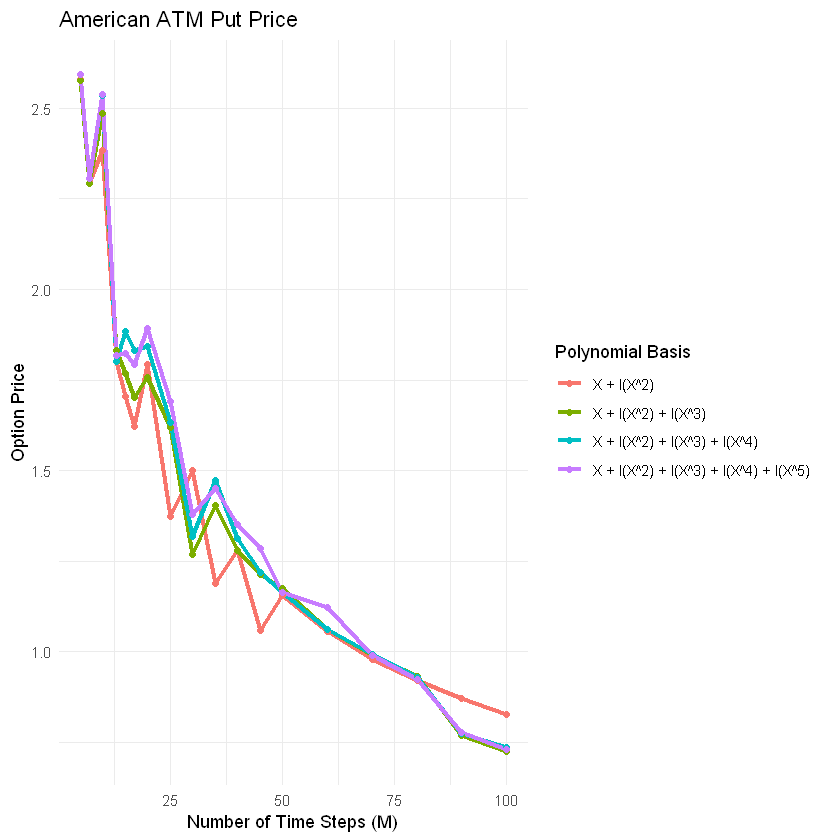

In [9]:
ggplot(df, aes(x = M, y = Price, color = Polynomial)) +
  geom_line(linewidth = 1.2) +
  geom_point() +
  labs(
    title = "American ATM Put Price",
    x = "Number of Time Steps (M)",
    y = "Option Price",
    color = "Polynomial Basis"
  ) +
  theme_minimal()

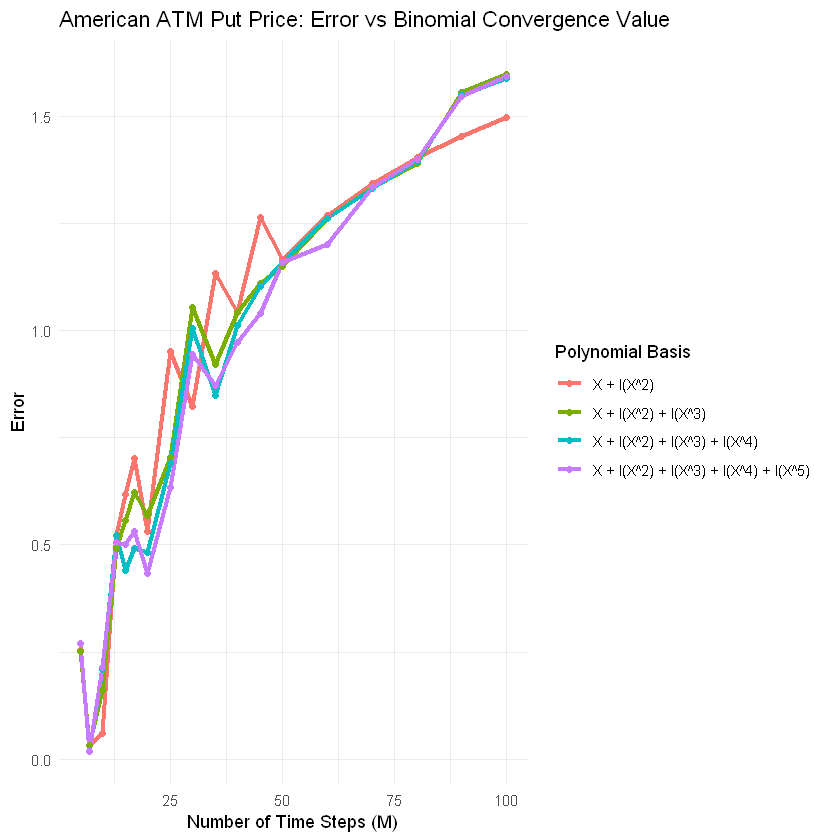

In [8]:
binomial_converge <- 2.32429
ggplot(df, aes(x = M, y = abs(Price - binomial_converge), color = Polynomial)) +
  geom_line(linewidth = 1.2) + 
  geom_point() +
  labs(
    title = "American ATM Put Price: Error vs Binomial Convergence Value",
    x = "Number of Time Steps (M)",
    y = "Error",
    color = "Polynomial Basis"
  ) +
  theme_minimal()

- As we increase the number of time steps M, the error increases and the option price decreases
- This result seems to be consistent across different polynomial bases